<a href="https://colab.research.google.com/github/E1250/cnn_cv-ref/blob/main/AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Lecture - https://www.youtube.com/watch?v=RbglhtfDob0&list=PLyhJeMedQd9T-jQgrOxKiuJ_Q0plUeMfF&index=2
* Lab - https://github.com/AhmedIbrahimai/Auto-encoder-in-python-computer-vision

# Auto-Encoders

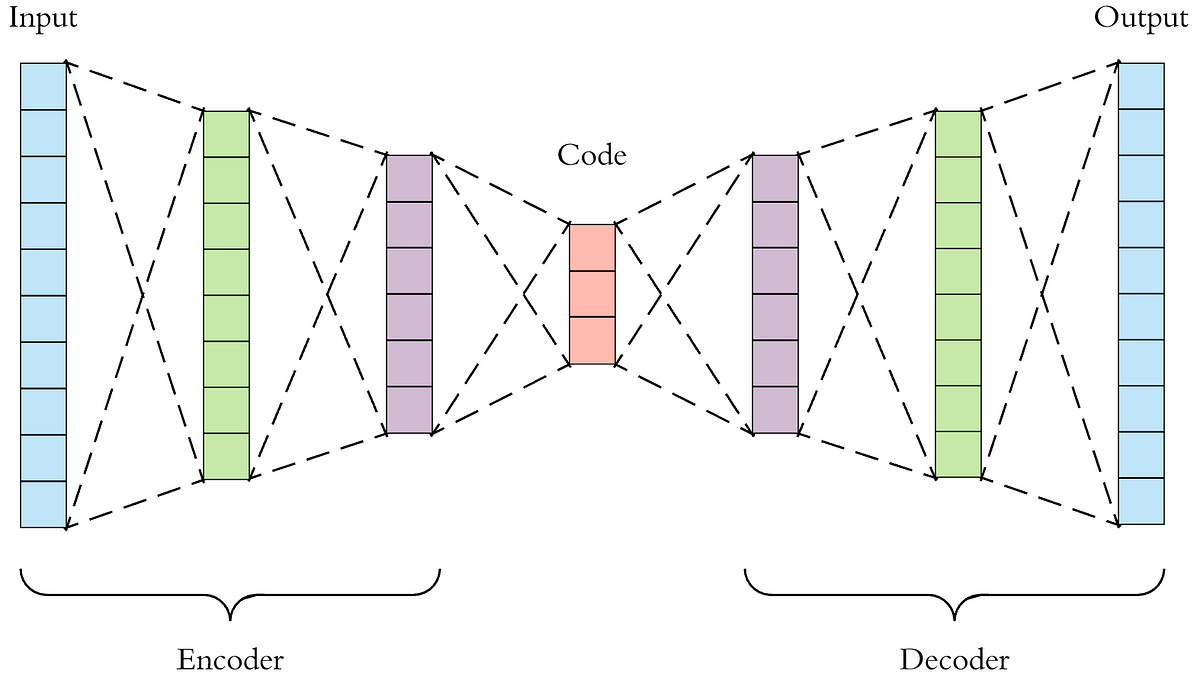

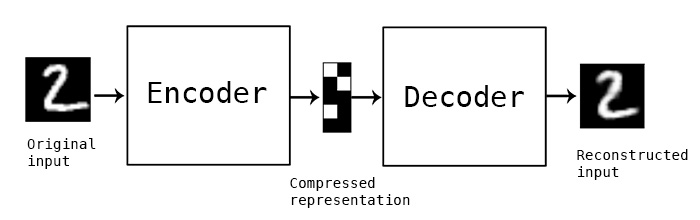

In [2]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

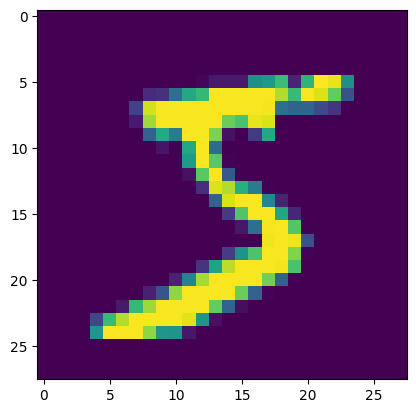

In [4]:
# Visulaize train data
plt.imshow(X_train[0]);

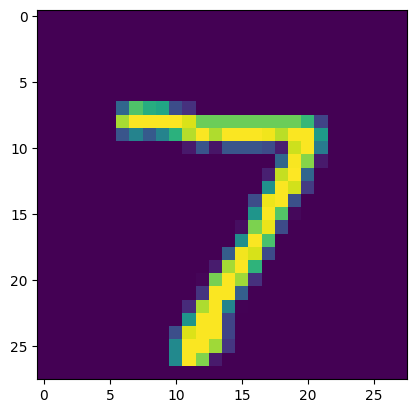

In [5]:
# Visualizing test data
plt.imshow(X_test[0]);

In [6]:
# Convert into Vectors
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train.shape

(60000, 784)

In [7]:
# rescale
X_train.max()

255

In [8]:
# Normalizing
X_train = X_train / 255.0 # Devide by max
X_test = X_test / 255.0
X_train.max()

1.0

## Model

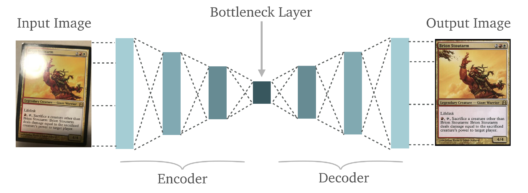

In [9]:
input_layer = Input(shape = (X_train.shape[1]))
bottleneck = Dense(32, activation = 'relu', name = 'bottleneck')(input_layer)
output = Dense(X_train.shape[1], activation = 'sigmoid', name = 'output')(bottleneck)

In [10]:
# This will be trained
autoencoder = Model(input_layer, output)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
encoder = Model(input_layer, bottleneck)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
encoded_layer = Input(shape = (32,), name = 'encoded_layer')
decoder_layer = autoencoder.layers[-1] # Represents the output layer (Decoder) of the autoencoder model
decoder = Model(encoded_layer, decoder_layer(encoded_layer))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoded_layer (InputLayer)  [(None, 32)]              0         
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 25872 (101.06 KB)
Trainable params: 25872 (101.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the full autoencoder
autoencoder.compile(loss = 'mse', optimizer = 'adam')
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size = 128)

Epoch 1/20
469/469 [==============================] - 36s 15ms/step - loss: 0.0541
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0258
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0186
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0150
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0128
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0116
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0110
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0107
Epoch 9/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0105
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0104
Epoch 11/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0104
Epoch 12/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0103
Epoch 13/20


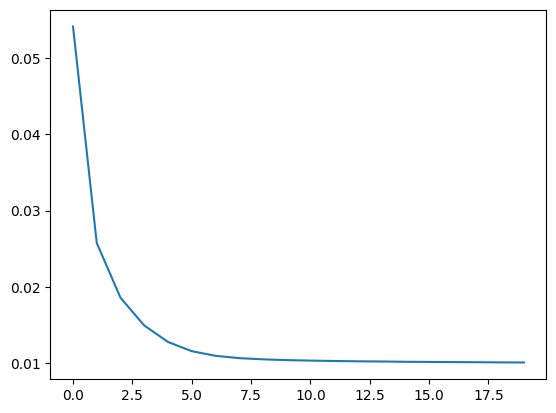

In [ ]:
plt.plot(history.history['loss']);

## Predicting

In [ ]:
# Compressing using encoder and Predicting on test data
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape

20/20 [==============================] - 2s 12ms/step


(10000, 32)

In [ ]:
# DeCompressing using decoder
output_data = decoder.predict(encoded_data, batch_size=512)
output_data.shape

20/20 [==============================] - 1s 10ms/step


(10000, 784)

In [ ]:
# Reshaping the output to display
output_data = output_data.reshape(output_data.shape[0], 28,28)
output_data.shape

(10000, 28, 28)

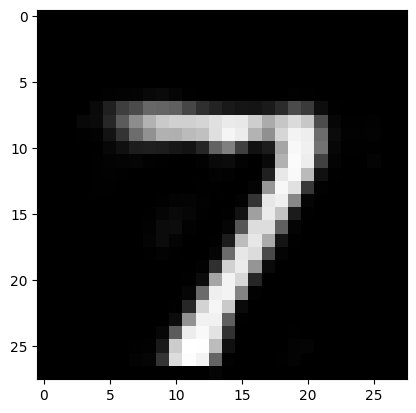

In [ ]:
# The output results from the bottelneck(Comprissed), not the Encoder
plt.imshow(output_data[0], cmap ='gray');

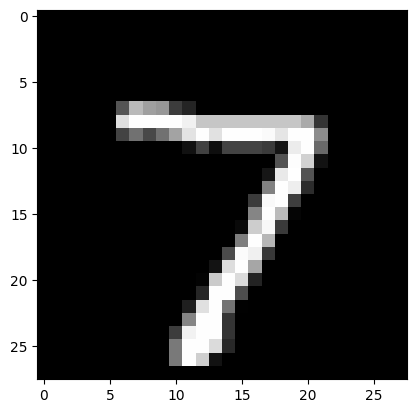

In [ ]:
# Plotting the real value (Input value)
X_test = X_test.reshape(10000, 28,28)
print("Shape ",X_test.shape)

plt.imshow(X_test[0], cmap = 'gray');